In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import utils

In [18]:
learning_rate_anr_capex = 0
learning_rate_h2_capex = 0
csv_path = './results/refining_anr_lr_'+str(learning_rate_anr_capex)+'_h2_lr_'+str(learning_rate_h2_capex)+'_wacc_'+str(utils.WACC)+'.csv'
clean_save_path = './results/refining_anr_lr_'+str(learning_rate_anr_capex)+'_h2_lr_'+str(learning_rate_h2_capex)+'_wacc_'+str(utils.WACC)+'_clean.csv'
save_fig_path = './results/refining_anr_lr_'+str(learning_rate_anr_capex)+'_h2_lr_'+str(learning_rate_h2_capex)+'_wacc_'+str(utils.WACC)+'.png'

In [19]:
df = pd.read_csv(csv_path)
df.sort_values(by=['Breakeven price ($/MMBtu)'], inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

In [20]:
anr_param = pd.read_excel('ANRs.xlsx', sheet_name='FOAK')

### Compute deployed power at each refinery and cumulative deployed ANR capacity

In [21]:
anr_thermal_power = anr_param[['Power in MWt', 'Reactor']]
anr_thermal_power
df = df.merge(anr_thermal_power, how='inner', left_on=['ANR type'], right_on=['Reactor'])
df.sort_values(by=['Breakeven price ($/MMBtu)'], inplace=True)
df['Deployed Power (MWt)'] = df['Power in MWt']*df['# ANR modules']
df['ANR Nameplate Capacity (GWt)'] = df['Deployed Power (MWt)'].cumsum()/1000
df['Cum h2 dem (t/day)'] = df['Ref. Dem. (kg/day)'].cumsum()/1000
df

,ref_id,Ref. Dem. (kg/day),Net Revenues ($/year),Ann. carbon emissions (kgCO2eq/year),HTSE,Alkaline,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt),Cum h2 dem (t/day)
0,CH_PAS,296403.233462,-1.834686e+08,2.785506e+07,297.0,0.0,0.0,iMSR,2,11.210591,300,iMSR,600,0.60,296.403233
7,WR_WOO,275407.694269,-1.742081e+08,2.495128e+07,276.0,0.0,0.0,PBR-HTGR,3,11.456234,200,PBR-HTGR,600,1.20,571.810928
1,Fl_SAI,288453.321893,-1.826201e+08,2.710475e+07,289.0,0.0,0.0,iMSR,2,11.466287,300,iMSR,600,1.80,860.264250
8,VA_BEN,89510.008206,-5.786489e+07,8.136288e+06,90.0,0.0,0.0,PBR-HTGR,1,11.708284,200,PBR-HTGR,200,2.00,949.774258
2,VA_NOR,129433.726403,-8.977220e+07,1.219245e+07,130.0,0.0,0.0,iMSR,1,12.561576,300,iMSR,300,2.30,1079.207984
9,HO_EL,81172.794100,-5.704704e+07,7.413062e+06,82.0,0.0,0.0,PBR-HTGR,1,12.728356,200,PBR-HTGR,200,2.50,1160.380778
10,TE_CAR,79564.451739,-5.684258e+07,7.232256e+06,80.0,0.0,0.0,PBR-HTGR,1,12.939110,200,PBR-HTGR,200,2.70,1239.945230
3,BP_FER,123324.900195,-8.913585e+07,1.162972e+07,124.0,0.0,0.0,iMSR,1,13.090352,300,iMSR,300,3.00,1363.270130
4,MA_MAR,118683.640511,-8.860555e+07,1.116078e+07,119.0,0.0,0.0,iMSR,1,13.521341,300,iMSR,300,3.30,1481.953771
5,WR_BOR,117784.691027,-8.849949e+07,1.106699e+07,118.0,0.0,0.0,iMSR,1,13.608230,300,iMSR,300,3.60,1599.738462


### Compute cumulative number of viable refineries and ANR modules

In [22]:
df['Viable ANR modules count'] = df['# ANR modules'].cumsum()
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df['Viable ANR refineries count'] = df.index+1
df.head(5)

,ref_id,Ref. Dem. (kg/day),Net Revenues ($/year),Ann. carbon emissions (kgCO2eq/year),HTSE,Alkaline,PEM,ANR type,# ANR modules,Breakeven price ($/MMBtu),Power in MWt,Reactor,Deployed Power (MWt),ANR Nameplate Capacity (GWt),Cum h2 dem (t/day),Viable ANR modules count,Viable ANR refineries count
0,CH_PAS,296403.233462,-1.834686e+08,2.785506e+07,297.0,0.0,0.0,iMSR,2,11.210591,300,iMSR,600,0.6,296.403233,2,1
1,WR_WOO,275407.694269,-1.742081e+08,2.495128e+07,276.0,0.0,0.0,PBR-HTGR,3,11.456234,200,PBR-HTGR,600,1.2,571.810928,5,2
2,Fl_SAI,288453.321893,-1.826201e+08,2.710475e+07,289.0,0.0,0.0,iMSR,2,11.466287,300,iMSR,600,1.8,860.264250,7,3
3,VA_BEN,89510.008206,-5.786489e+07,8.136288e+06,90.0,0.0,0.0,PBR-HTGR,1,11.708284,200,PBR-HTGR,200,2.0,949.774258,8,4
4,VA_NOR,129433.726403,-8.977220e+07,1.219245e+07,130.0,0.0,0.0,iMSR,1,12.561576,300,iMSR,300,2.3,1079.207984,9,5


### Compute avoided carbon emissions 

In [23]:
SMR_carbon_intensity = 11.888 #kgCO2eq/kgH2
df['Ann. avoided CO2 emissions (MMT-CO2/year)'] = (df['Ref. Dem. (kg/day)']*365*SMR_carbon_intensity - df['Ann. carbon emissions (kgCO2eq/year)'])/1e9
df['Viable avoided emissions (MMT-CO2/year)'] = df['Ann. avoided CO2 emissions (MMT-CO2/year)'].cumsum()
df[['Breakeven price ($/MMBtu)', 'Viable avoided emissions (MMT-CO2/year)']].tail(110)


,Breakeven price ($/MMBtu),Viable avoided emissions (MMT-CO2/year)
0,11.210591,1.258274
1,11.456234,2.428350
2,11.466287,3.652879
3,11.708284,4.033137
4,12.561576,4.582573
5,12.728356,4.927379
6,12.939110,5.265386
7,13.090352,5.788878
8,13.521341,6.292700
9,13.608230,6.792715


### Save clean version of results


In [24]:
df_clean = df[["ref_id", 'Ref. Dem. (kg/day)', 'HTSE', 'ANR type', '# ANR modules', 'Net Revenues ($/year)', 'Ann. avoided CO2 emissions (MMT-CO2/year)', 'Breakeven price ($/MMBtu)']]

df_clean['Ref. Dem. (kg/day)'] /=1e3
df_clean['HTSE'] = df_clean['HTSE'].apply(lambda x: int(x))
df_clean['Ref. Dem. (kg/day)'] = df_clean['Ref. Dem. (kg/day)'].apply(lambda x:np.round(x,1))
df_clean['Net Revenues ($/year)'] /=1e6
df_clean['Avoided cost of CO2 ($/ton)'] = df_clean['Net Revenues ($/year)']/df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)']
df_clean['Avoided cost of CO2 ($/ton)'] = df_clean['Avoided cost of CO2 ($/ton)'].apply(lambda x:np.round(np.abs(x),1))
df_clean['Net Revenues ($/year)'] = df_clean['Net Revenues ($/year)'].apply(lambda x: np.abs(np.round(x,1)))
df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)']= df_clean['Ann. avoided CO2 emissions (MMT-CO2/year)'].apply(lambda x: np.round(x,1))
df_clean['Breakeven price ($/MMBtu)'] = df_clean.apply(lambda x:np.round(x['Breakeven price ($/MMBtu)'],1), axis=1)
df_clean.rename(columns={'Ref. Dem. (kg/day)': 'Demand (MT H2/day)',
                         'Net Revenues ($/year)': 'Cost (M$/year)', 
                         'ANR type': 'ANR', 
                         '# ANR modules': '#'}, inplace=True)
df_clean.sort_values(by=['Breakeven price ($/MMBtu)'], inplace=True)
df_clean.to_csv(clean_save_path, index=False)

C:\Users\mgarrou\AppData\Local\Temp\ipykernel_16228\772713288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Ref. Dem. (kg/day)'] /=1e3
C:\Users\mgarrou\AppData\Local\Temp\ipykernel_16228\772713288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['HTSE'] = df_clean['HTSE'].apply(lambda x: int(x))
C:\Users\mgarrou\AppData\Local\Temp\ipykernel_16228\772713288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

### Plots

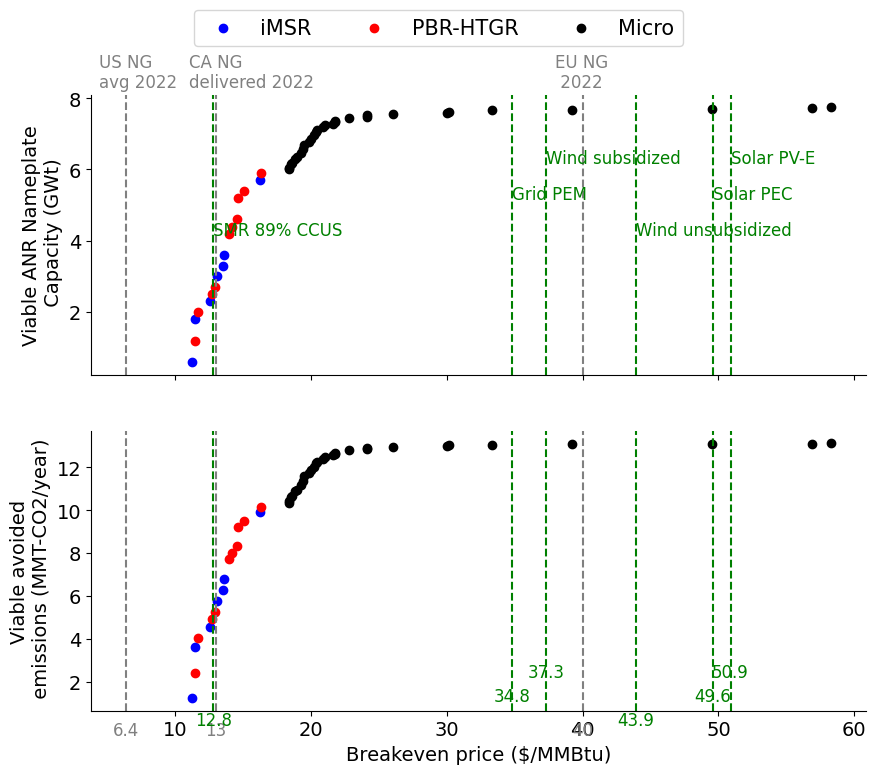

In [25]:
#Use latex font
#plt.rcParams['text.usetex'] = True
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['font.size'] = 14

# Create subplots
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Get unique ANR types and assign colors
anr_types = df['ANR type'].unique()

colors = ['blue', 'red', 'black']  # Adjust the colors according to the unique ANR types
# Initialize empty handles for legend
handles = []
# Plotting the data as scatter plots with different colors for each ANR type
#labels = {'Viable ANR modules count': 'Viable ANR \nmodules count', 
 #           'Viable ANR refineries count': 'Viable ANR\n refineries count', 
labels = {'ANR Nameplate Capacity (GWt)': 'Viable ANR Nameplate\n Capacity (GWt)',
            'Viable avoided emissions (MMT-CO2/year)': 'Viable avoided\n emissions (MMT-CO2/year)'}
for i, col in enumerate(['ANR Nameplate Capacity (GWt)', 'Viable avoided emissions (MMT-CO2/year)']):
    for anr_type, color in zip(anr_types, colors):
        subset = df[df['ANR type'] == anr_type]
        axs[i].scatter(subset['Breakeven price ($/MMBtu)'], subset[col], color=color, label=f'{anr_type}')
    axs[i].set_ylabel(labels[col])

    # Remove the top and right spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)

    # Adding vertical lines
    res_be = pd.read_csv('./results/res_be_refining.csv')
    res_be.sort_values(by='Breakeven price ($/MMBtu)', inplace=True)
    res_be['Breakeven price ($/MMBtu)'] = res_be.apply(lambda x:np.round(x['Breakeven price ($/MMBtu)'],1), axis=1)
    ng_vertical_lines = [6.4, 13, 40]
    ng_labels = ['US NG\navg 2022', 'CA NG\ndelivered 2022', 'EU NG\n 2022']
    res_vert_lines = list(res_be['Breakeven price ($/MMBtu)'])
    for line in ng_vertical_lines:
        axs[i].axvline(x=line, linestyle='--', color='grey')
        #axs[i].text(line, axs[i].get_ylim()[0]-0.2, str(line), color='grey', fontsize=12, va='top', ha='center')
    for l,line in enumerate(res_vert_lines):
        axs[i].axvline(x=line, linestyle='--',color='green')
        #axs[i].text(line+1.5*np.mod(l,3), axs[i].get_ylim()[0]-0.6, str(line), fontsize=12, color='green',va='top', ha='center')

ng_labels = ['US NG\navg 2022', 'CA NG\ndelivered 2022', 'EU NG\n 2022']
for x, l in zip(ng_vertical_lines, ng_labels):
    axs[0].text(x-2, axs[0].get_ylim()[1]+0.2, l, fontsize=12, color='grey')
    axs[1].text(x, axs[i].get_ylim()[0]-0.5, str(x), color='grey', fontsize=12, va='top', ha='center')

res_labels = res_be['RES']
count = 0
for x, label in zip(res_vert_lines, res_labels):
    axs[0].text(x, (axs[0].get_ylim()[1]+axs[0].get_ylim()[0])/2+np.mod(count,3), label, fontsize=12, color='green')
    axs[1].text(x, axs[1].get_ylim()[0]+1.1*np.mod(count,3), str(x), color='green', fontsize=12, va='top',ha='center')
    count+=1

# Setting the title and labels
plt.xlabel('Breakeven price ($/MMBtu)')
#fig.text(0.5, 0.07, 'Breakeven price ($/MMBtu)', ha='center')

# Add a common legend for all subplots
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(anr_types))
#fig.tight_layout()
#plt.show()
plt.savefig(save_fig_path)